In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold,SelectKBest,RFE,chi2,SelectFromModel
from sklearn.decomposition import PCA
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [8]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

In [9]:
male_counts=len(df[df.Gender=='Male'])
female_counts=len(df[df.Gender=='Female'])
nan_counts=len(df[df.Gender.isnull()])
print("Percentage of Male Applicant",(male_counts/(len(df.Gender))*100))
print("Percentage of Female Applicant",(female_counts/(len(df.Gender))*100))
print("Percentage of Null Values",(nan_counts/(len(df.Gender))*100))

Percentage of Male Applicant 79.64169381107492
Percentage of Female Applicant 18.241042345276874
Percentage of Null Values 2.1172638436482085


In [10]:
married_counts=len(df[df.Married=='Yes'])
unmarried_counts=len(df[df.Married=='No'])
nan_counts=len(df[df.Married.isnull()])
print("Percentage of Married Applicant",(married_counts/(len(df.Married))*100))
print("Percentage of Unmarried Applicant",(unmarried_counts/(len(df.Married))*100))
print("Percentage of Null Values",(nan_counts/(len(df.Married))*100))

Percentage of Married Applicant 64.82084690553745
Percentage of Unmarried Applicant 34.69055374592834
Percentage of Null Values 0.4885993485342019


In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
graduate_counts=len(df[df.Education=='Graduate'])
no_graduate_counts=len(df[df.Education=='Not Graduate'])
nan_counts=len(df[df.Education.isnull()])
print("Percentage of graduated Applicant",(graduate_counts/(len(df.Education))*100))
print("Percentage of Ungraduated Applicant",(no_graduate_counts/(len(df.Education))*100))
print("Percentage of Null Values",(nan_counts/(len(df.Education))*100))

Percentage of graduated Applicant 78.17589576547232
Percentage of Ungraduated Applicant 21.824104234527688
Percentage of Null Values 0.0


In [13]:
selfemployed_counts=len(df[df.Self_Employed=='Yes'])
no_selfemployed_counts=len(df[df.Self_Employed=='No'])
nan_counts=len(df[df.Self_Employed.isnull()])
print("Percentage of self employed Applicant",(selfemployed_counts/(len(df.Self_Employed))*100))
print("Percentage of non self employed Applicant",(no_selfemployed_counts/(len(df.Self_Employed))*100))
print("Percentage of Null Values",(nan_counts/(len(df.Self_Employed))*100))

Percentage of self employed Applicant 13.355048859934854
Percentage of non self employed Applicant 81.43322475570032
Percentage of Null Values 5.211726384364821


In [14]:
urban_counts=len(df[df.Property_Area=='Urban'])
rural_counts=len(df[df.Property_Area=='Rural'])
nan_counts=len(df[df.Property_Area.isnull()])
print("Percentage of urban Applicant",(selfemployed_counts/(len(df.Property_Area))*100))
print("Percentage of rural Applicant",(no_selfemployed_counts/(len(df.Property_Area))*100))
print("Percentage of Null Values",(nan_counts/(len(df.Property_Area))*100))

Percentage of urban Applicant 13.355048859934854
Percentage of rural Applicant 81.43322475570032
Percentage of Null Values 0.0


In [15]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [18]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


In [19]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [21]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [22]:
num=df[["ApplicantIncome",'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

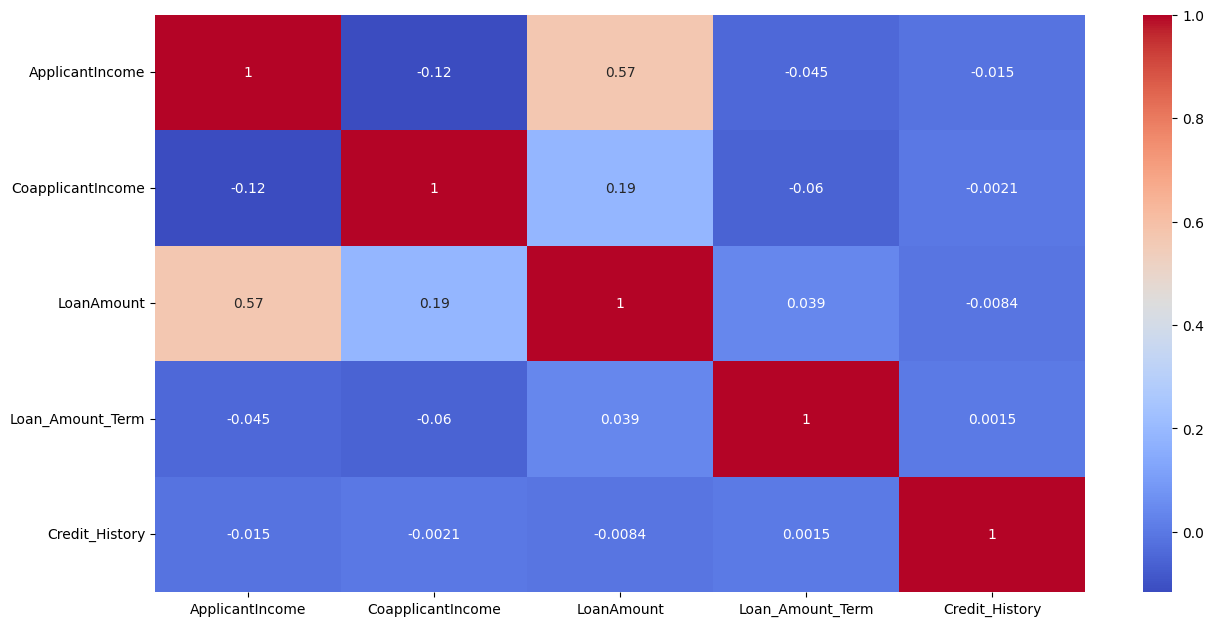

In [23]:
correlation=num.corr()
plt.figure(figsize=(15,7.5))
sns.heatmap(correlation,cmap='coolwarm',annot=True)
plt.show()

In [24]:
num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

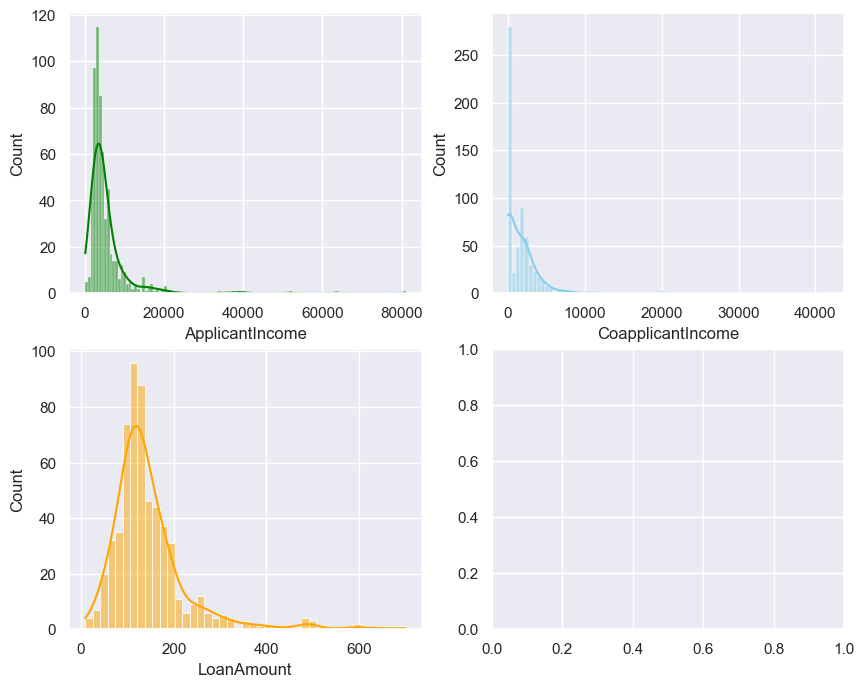

In [25]:
#showing the data distribution of the numerical features
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')

In [26]:
df.drop('Loan_ID',axis=1,inplace=True)

In [27]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14388\3023607144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14388\3023607144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df['Gender'].fillna(df['Gender'].mode(),inplace=True)


In [31]:
df['Married'].fillna(df['Married'].mode(),inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(),inplace=True)
df['Education'].fillna(df['Education'].mode(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode(),inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(),inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode(),inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode(),inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14388\692295371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].fillna(df['Education'].mode(),inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14388\692295371.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [32]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [34]:
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(df[['Gender','Married','Education','Self_Employed','Property_Area']])
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(['Gender','Married','Education','Self_Employed','Property_Area']))
df_final=pd.concat([df,encoded_df],axis=1)

In [35]:
df_final.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [36]:
df_final.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0,N,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,3000,0.0,66.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
from scipy.stats import zscore, skew
import pandas as pd
import numpy as np

# Placeholder for outlier summary
outlier_summary = []

# Analyze each numerical column in the dataset
for column in df_final.select_dtypes(include=[np.number]).columns:
    # Step 1: Calculate Z-scores without modifying the original dataset
    z_scores = zscore(df_final[column].dropna())  # Drop NaNs for calculation if any

    # Step 2: Identify Outliers (|z| > 3 as threshold)
    outliers = np.abs(z_scores) > 3
    num_outliers = np.sum(outliers)

    # Step 3: Calculate Skewness
    data_skewness = skew(df_final[column].dropna())  # Drop NaNs for skewness calculation
    
    # Step 4: Calculate Percentage of Outliers
    outlier_percentage = (num_outliers / len(df_final[column])) * 100

    # Store results for each column
    outlier_summary.append({
        'Column': column,
        'Skewness': round(data_skewness, 2),
        'Outlier Percentage': round(outlier_percentage, 2),
        'Number of Outliers': num_outliers
    })

# Convert the summary into a DataFrame for easy viewing
outlier_summary_df = pd.DataFrame(outlier_summary)

# Display the outlier summary for each column
print(outlier_summary_df)


                     Column  Skewness  Outlier Percentage  Number of Outliers
0           ApplicantIncome      6.52                1.30                   8
1         CoapplicantIncome      7.47                0.98                   6
2                LoanAmount      2.72                2.44                  15
3          Loan_Amount_Term     -2.40                1.95                  12
4            Credit_History     -2.02                0.00                   0
5             Gender_Female      1.64                0.00                   0
6               Gender_Male     -1.64                0.00                   0
7                Married_No      0.64                0.00                   0
8               Married_Yes     -0.64                0.00                   0
9        Education_Graduate     -1.36                0.00                   0
10   Education_Not Graduate      1.36                0.00                   0
11         Self_Employed_No     -2.15                0.00       

In [38]:
import pandas as pd

# Assuming df_final is your dataset

# Select only numeric columns for IQR calculation
df_numeric = df_final.select_dtypes(include=[float, int])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers (values outside of the bounds)
outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound))

# Calculate percentage of outliers in the dataset
outliers_percentage = (outliers.sum().sum() / df_numeric.size) * 100

# Show the number of outliers and their percentage
print(f"Outliers Percentage: {outliers_percentage}%")
print("Outliers Detected:")
print(outliers.sum())



Outliers Percentage: 9.588762214983714%
Outliers Detected:
ApplicantIncome             50
CoapplicantIncome           18
LoanAmount                  41
Loan_Amount_Term            88
Credit_History              89
Gender_Female              112
Gender_Male                112
Married_No                   0
Married_Yes                  0
Education_Graduate         134
Education_Not Graduate     134
Self_Employed_No            82
Self_Employed_Yes           82
Property_Area_Rural          0
Property_Area_Semiurban      0
Property_Area_Urban          0
dtype: int64


In [39]:
def calculate_outliers_percentage(df):
    outlier_percentage = {}
    
    for column in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Step 1: Calculate median
            median = np.median(df[column])
            
            # Step 2: Calculate absolute deviations
            abs_deviations = np.abs(df[column] - median)
            
            # Step 3: Calculate MAD
            mad = np.median(abs_deviations)
            
            # Step 4: Set threshold for outliers (3 * MAD)
            threshold = 3 * mad
            
            # Step 5: Count outliers
            outliers = np.sum(abs_deviations > threshold)
            
            # Step 6: Calculate percentage of outliers
            percentage = (outliers / len(df[column])) * 100
            
            # Save the result
            outlier_percentage[column] = percentage
        else:
            # Skip non-numeric columns
            outlier_percentage[column] = None
            
    return outlier_percentage

# Assuming df_final is your dataframe
outlier_percentages = calculate_outliers_percentage(df_final)
outlier_percentages



{'Dependents': None,
 'ApplicantIncome': np.float64(15.146579804560261),
 'CoapplicantIncome': np.float64(5.374592833876222),
 'LoanAmount': np.float64(12.214983713355048),
 'Loan_Amount_Term': np.float64(14.332247557003258),
 'Credit_History': np.float64(14.495114006514658),
 'Loan_Status': None,
 'Gender_Female': np.float64(18.241042345276874),
 'Gender_Male': np.float64(18.241042345276874),
 'Married_No': np.float64(34.69055374592834),
 'Married_Yes': np.float64(34.69055374592834),
 'Education_Graduate': np.float64(21.824104234527688),
 'Education_Not Graduate': np.float64(21.824104234527688),
 'Self_Employed_No': np.float64(13.355048859934854),
 'Self_Employed_Yes': np.float64(13.355048859934854),
 'Property_Area_Rural': np.float64(29.153094462540718),
 'Property_Area_Semiurban': np.float64(37.94788273615635),
 'Property_Area_Urban': np.float64(32.89902280130293)}

In [40]:
import numpy as np
import pandas as pd

def mad_winsorize(df, threshold_factor=3):
    df_winsorized = df.copy()  # Create a copy to avoid modifying the original dataset
    
    for column in df_winsorized.select_dtypes(include=[np.number]).columns:
        # Step 1: Calculate median
        median = np.median(df_winsorized[column].dropna())
        
        # Step 2: Calculate MAD
        abs_deviation = np.abs(df_winsorized[column] - median)
        mad = np.median(abs_deviation)
        
        # Step 3: Set threshold for outliers (threshold_factor * MAD)
        threshold = threshold_factor * mad
        
        # Step 4: Define Winsorization boundaries
        lower_bound = median - threshold
        upper_bound = median + threshold

        # Step 5: Apply Winsorization
        df_winsorized[column] = np.where(
            df_winsorized[column] < lower_bound, 
            lower_bound, 
            np.where(df_winsorized[column] > upper_bound, upper_bound, df_winsorized[column])
        )
    
    return df_winsorized

# Assuming df_final is your DataFrame
mad_winsorize(df_final[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849.0,0.0,146.412162
1,4583.0,1508.0,128.000000
2,3000.0,0.0,66.000000
3,2583.0,2358.0,120.000000
4,6000.0,0.0,141.000000
...,...,...,...
609,2900.0,0.0,71.000000
610,4106.0,0.0,40.000000
611,7501.0,240.0,220.500000
612,7501.0,0.0,187.000000


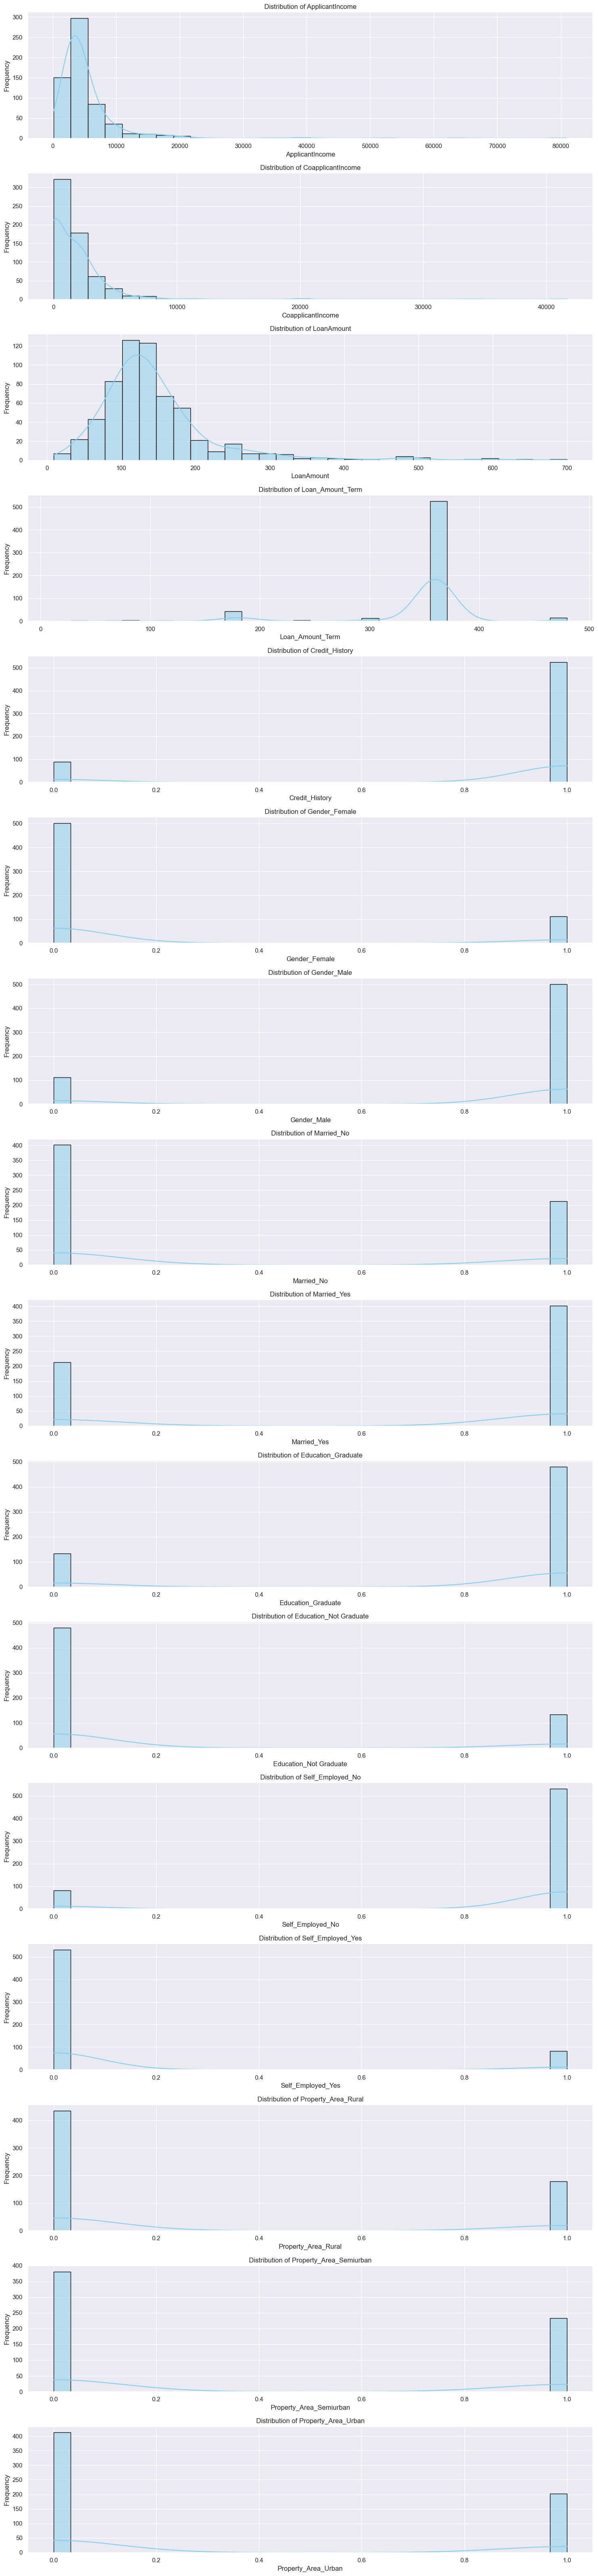

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data_distribution(df):
    # Filter only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    # Set up the figure for multiple subplots
    plt.figure(figsize=(15, len(numeric_columns) * 4))
    
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)
        
        # Plot histogram and KDE
        sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black')
        
        # Set title and labels
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Assuming df_final is your DataFrame
plot_data_distribution(df_final)


In [42]:
df_final.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0,N,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,3000,0.0,66.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0,Y,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0,Y,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
dependent_count = df_final['Dependents'].value_counts()
print(dependent_count)

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


In [44]:
df_final['Dependents']=df_final['Dependents'].str.replace('3+','3').astype('int64')

In [45]:
encoder=LabelEncoder()
df_final['Loan_Status']=encoder.fit_transform(df_final['Loan_Status'])

In [46]:
df_final

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.412162,360.0,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4583,1508.0,128.000000,360.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,3000,0.0,66.000000,360.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,2583,2358.0,120.000000,360.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0,6000,0.0,141.000000,360.0,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,3,4106,0.0,40.000000,180.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,1,8072,240.0,253.000000,360.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,2,7583,0.0,187.000000,360.0,1.0,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [47]:
x=df_final.drop('Loan_Status',axis=1)
y=df_final['Loan_Status']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=20)

In [49]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(594, 17) (20, 17) (594,) (20,)


In [50]:
x_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.737374,5466.846801,1633.850034,147.462383,342.020202,0.851852,0.186869,0.813131,0.351852,0.648148,0.779461,0.220539,0.867003,0.132997,0.291246,0.377104,0.331650
std,1.006748,6194.117402,2964.535662,84.873890,64.827385,0.355546,0.390135,0.390135,0.477951,0.477951,0.414959,0.414959,0.339857,0.339857,0.454719,0.485070,0.471203
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2883.750000,0.000000,102.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3839.500000,1188.500000,130.000000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5820.500000,2305.000000,165.750000,360.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
x_test.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.950000,3520.850000,1246.900000,115.220608,354.000000,0.950000,0.050000,0.950000,0.200000,0.800000,0.850000,0.150000,0.850000,0.150000,0.300000,0.450000,0.250000
std,1.099043,1661.380791,1349.756699,44.338857,51.134498,0.223607,0.223607,0.223607,0.410391,0.410391,0.366348,0.366348,0.366348,0.366348,0.470162,0.510418,0.444262
min,0.000000,1000.000000,0.000000,59.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2700.250000,0.000000,72.750000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,3085.000000,1100.500000,108.500000,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4202.750000,2199.000000,147.559122,360.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.250000
max,3.000000,9083.000000,3806.000000,228.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Apply log transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Fit and transform x_train, transform x_test
x_train_transformed = log_transformer.fit_transform(x_train)
x_test_transformed = log_transformer.transform(x_test)

# Convert transformed data back to DataFrame with original column names
x_train = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_test = pd.DataFrame(x_test_transformed, columns=x_test.columns)

In [53]:
x_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,7.702556,7.026427,4.993232,5.888878,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.0,0.000000,0.693147
1,1.098612,8.517393,8.207402,5.468060,5.888878,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.0,0.693147,0.000000
2,0.000000,8.467793,0.000000,5.068904,6.175867,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.0,0.693147,0.000000
3,0.693147,8.835792,0.000000,5.303305,5.888878,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.0,0.693147,0.000000
4,0.693147,9.492733,0.000000,3.713572,5.888878,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.0,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1.098612,7.536897,7.536897,4.584967,5.888878,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.693147,0.0,0.693147,0.000000
590,1.098612,9.342946,7.027315,5.420535,5.888878,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.0,0.000000,0.693147
591,0.000000,8.082711,0.000000,3.433987,5.888878,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.0,0.000000,0.693147
592,0.000000,9.215129,0.000000,4.993232,5.484797,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.0,0.693147,0.000000


In [54]:
x_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.407436,8.350537,4.293212,4.877017,5.804760,0.590459,0.129528,0.563620,0.243885,0.449262,0.540281,0.152866,0.600961,0.092186,0.201876,0.261389,0.229882
std,0.517802,0.648967,3.877954,0.493875,0.313267,0.246446,0.270421,0.270421,0.331290,0.331290,0.287628,0.287628,0.235571,0.235571,0.315188,0.336225,0.326613
min,0.000000,5.017280,0.000000,2.302585,2.564949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.967193,0.000000,4.637144,5.888878,0.693147,0.000000,0.693147,0.000000,0.000000,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.253356,7.081125,4.875197,5.888878,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000
75%,0.693147,8.669313,7.743269,5.116492,5.888878,0.693147,0.000000,0.693147,0.693147,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147,0.693147,0.693147
max,1.386294,11.302217,10.637489,6.552508,6.175867,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


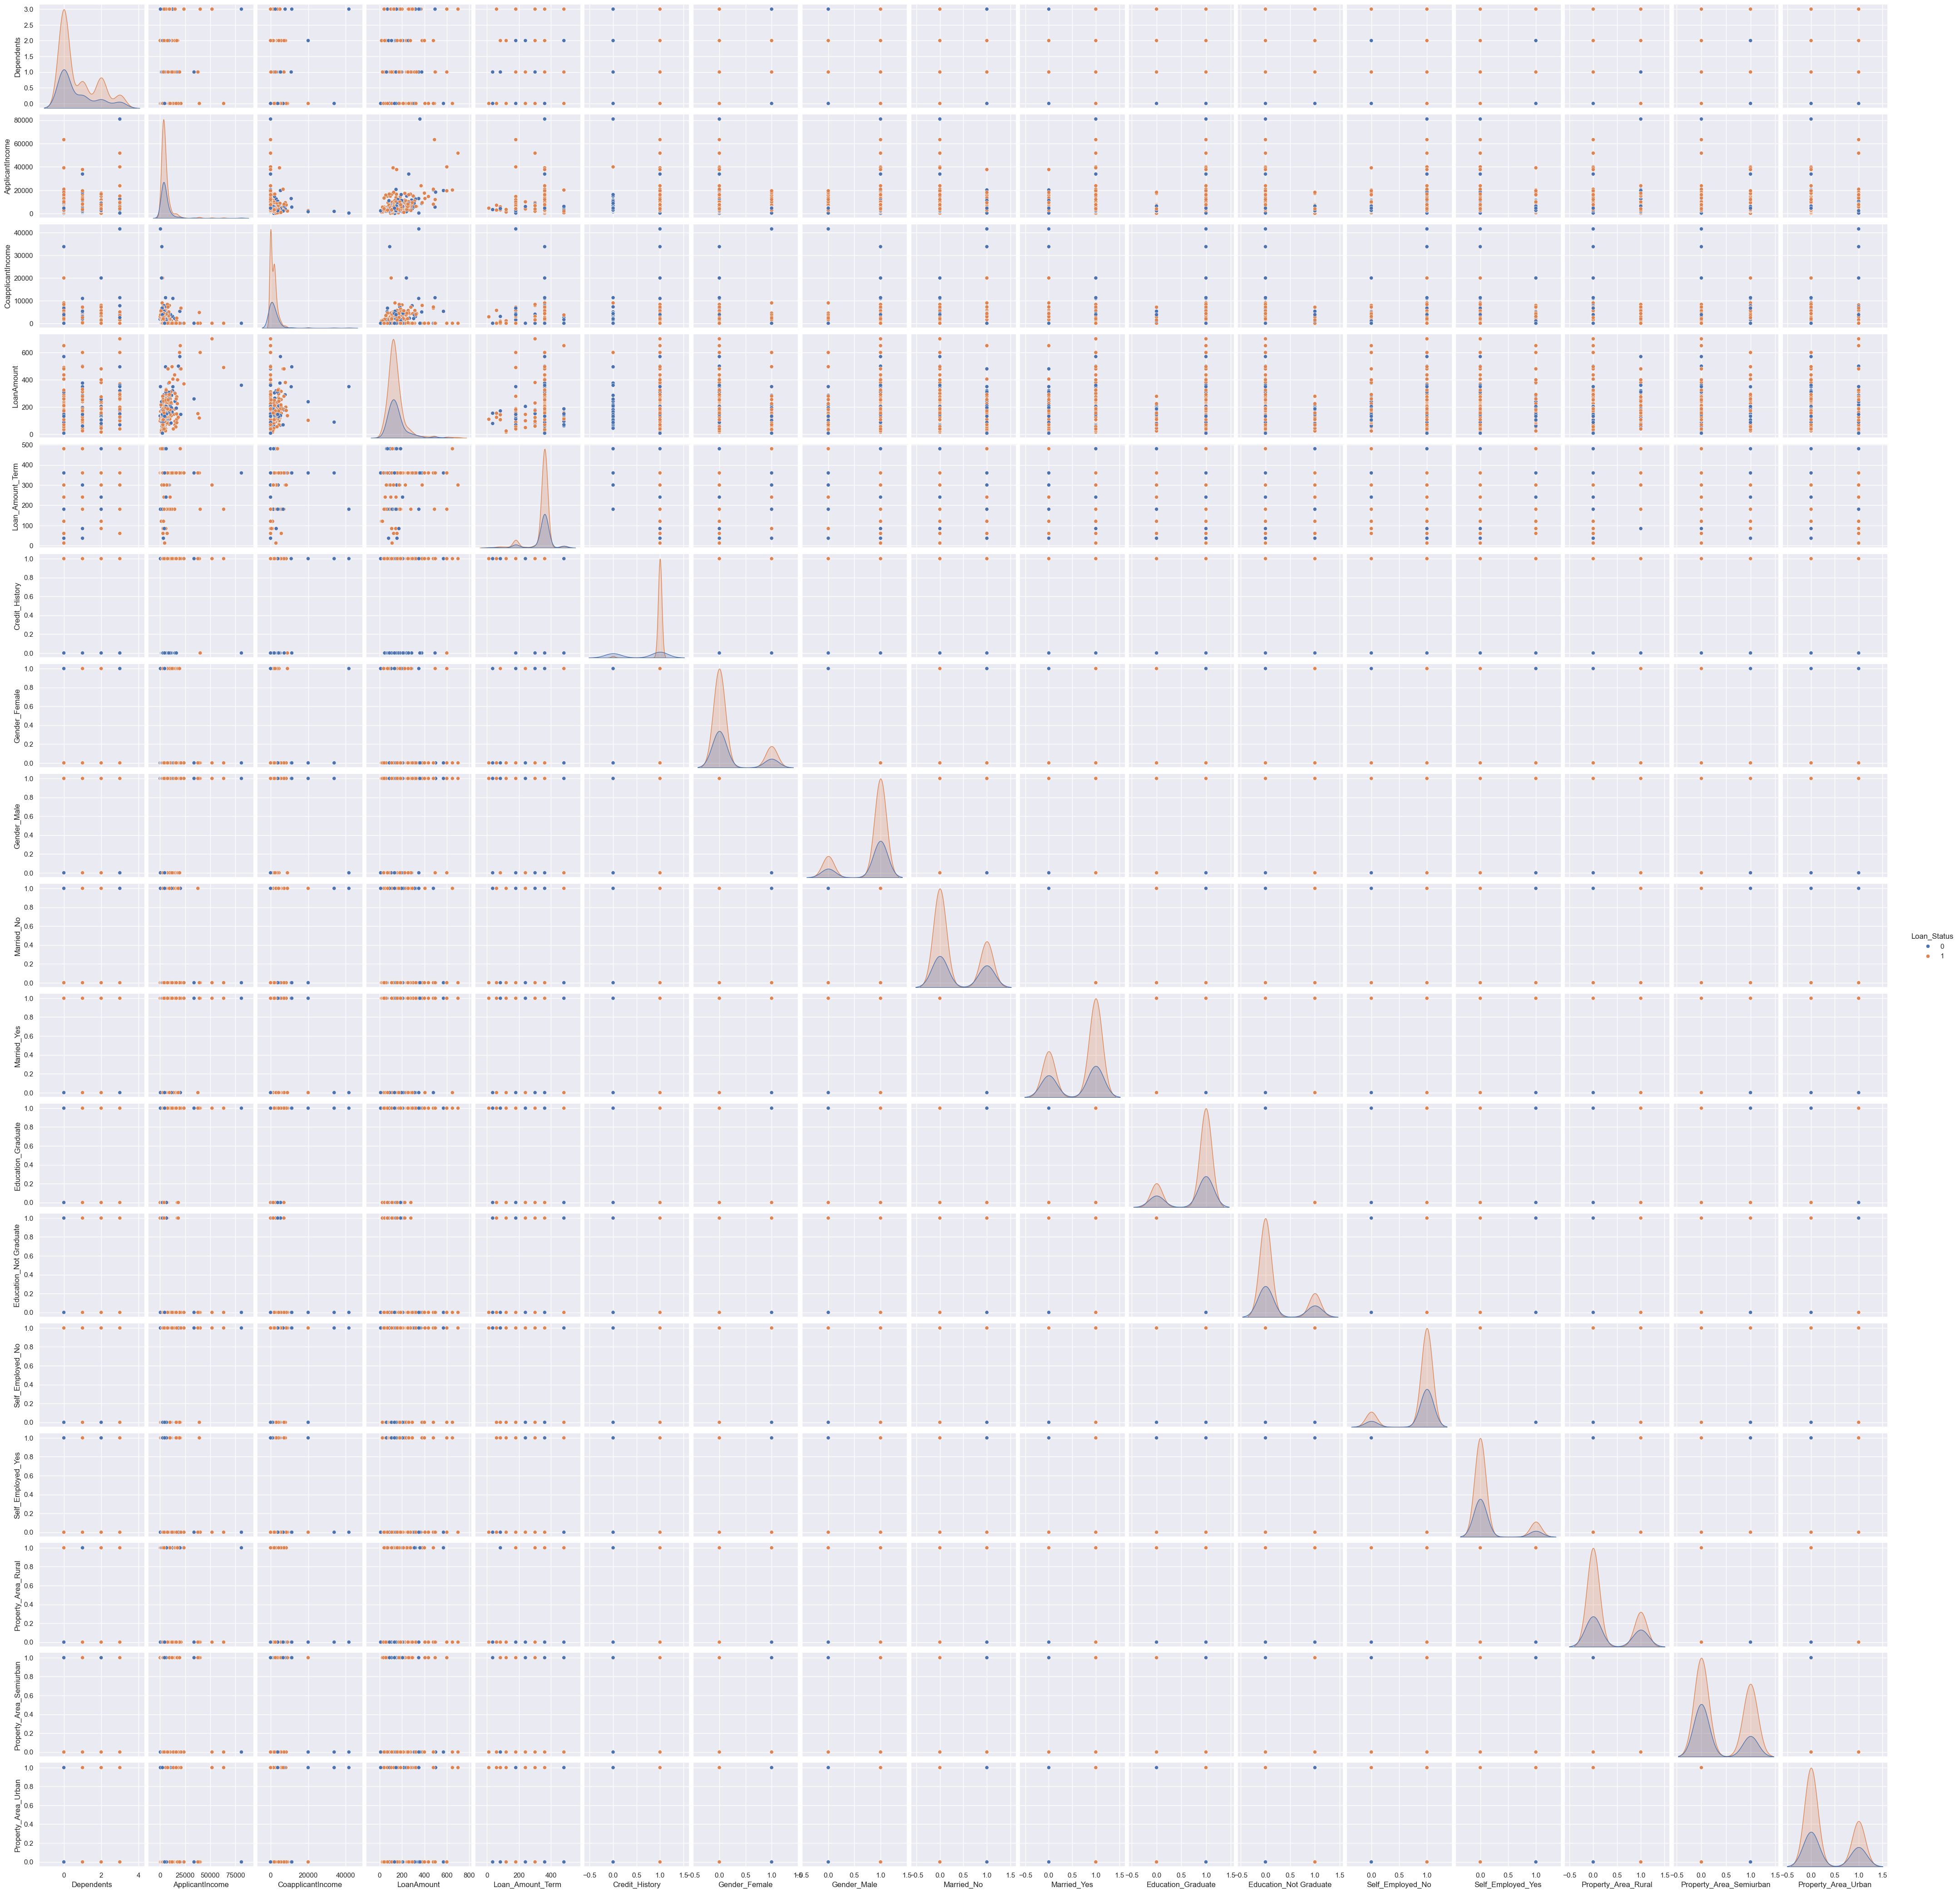

In [55]:
#Testing all the assumptions of the logistic regression before fitting it
#Assumption-1 Linearity

sns.pairplot(df_final, hue="Loan_Status")
plt.show()

In [56]:
model=LogisticRegression(max_iter=500)
grid_parameter={'class_weight':['none','balanced'],
                'solver':['sag','saga','liblinear','lbfgs'],
                'penalty':['l1','l2','elasticnet','none'],
                'C':[1,0.1,0.001,10,100],
                'tol':[1e-4, 1e-3, 1e-2],
                'l1_ratio':[0.1,0.5,0.3,0.9],
                'random_state':[42,50,56]
                }
grid_search=GridSearchCV(estimator=model,param_grid=grid_parameter,scoring='accuracy',cv=10,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)


Fitting 10 folds for each of 5760 candidates, totalling 57600 fits


c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45000 fits failed out of a total of 57600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_p

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [1, 0.1, 0.001, 10, 100],
                         'class_weight': ['none', 'balanced'],
                         'l1_ratio': [0.1, 0.5, 0.3, 0.9],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [42, 50, 56],
                         'solver': ['sag', 'saga', 'liblinear', 'lbfgs'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy', verbose=1)

In [57]:
# Best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model with the best parameters on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x)  # Replace `x` with test data for evaluation
print("\nClassification Report:\n", classification_report(y, y_pred))

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001}
Best Score: 0.8063276836158193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.20      0.33       192
           1       0.73      0.99      0.84       422

    accuracy                           0.74       614
   macro avg       0.83      0.60      0.58       614
weighted avg       0.79      0.74      0.68       614



In [58]:
from sklearn.metrics import accuracy_score
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTraining Accuracy:", round(train_accuracy, 4))
print("Testing Accuracy:", round(test_accuracy, 4))
print("\nClassification Report (Train Data):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


Training Accuracy: 0.8064
Testing Accuracy: 0.9

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       189
           1       0.79      0.98      0.87       405

    accuracy                           0.81       594
   macro avg       0.85      0.71      0.73       594
weighted avg       0.83      0.81      0.78       594


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



In [59]:
# Get predicted probabilities (for log-loss and cross-entropy)
from sklearn.metrics import log_loss
y_train_pred_prob = best_model.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_model.predict_proba(x_test)[:, 1]

# Log-Loss for Train and Test Data
train_log_loss = log_loss(y_train, y_train_pred_prob)
test_log_loss = log_loss(y_test, y_test_pred_prob)

# Print the Log-Loss for train and test data
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

# Maximum Likelihood (Log-Loss is the negative log-likelihood for logistic regression)
# So the maximum likelihood is just the negative of the log-loss
train_mle = -train_log_loss
test_mle = -test_log_loss

print(f"Train Maximum Likelihood: {train_mle}")
print(f"Test Maximum Likelihood: {test_mle}")

# Classification Report for evaluation
print("\nClassification Report (Train Data):\n", classification_report(y_train, best_model.predict(x_train)))
print("\nClassification Report (Test Data):\n", classification_report(y_test, best_model.predict(x_test)))

Train Log-Loss: 0.5453648362952203
Test Log-Loss: 0.5340878452767657
Train Maximum Likelihood: -0.5453648362952203
Test Maximum Likelihood: -0.5340878452767657

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       189
           1       0.79      0.98      0.87       405

    accuracy                           0.81       594
   macro avg       0.85      0.71      0.73       594
weighted avg       0.83      0.81      0.78       594


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[ 1  2]
 [ 0 17]]


In [61]:
print(confusion_matrix(y_train,y_train_pred))

[[ 81 108]
 [  7 398]]


In [62]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
param_grid={
    'criterion':['entropy','gini'],
    'max_depth':[10,20,50,100,None],
    'min_samples_split':[5,10,15,20],
    'min_samples_leaf':[1,2,4,5]
}

grid_search=GridSearchCV(param_grid=param_grid,scoring='accuracy',cv=10,estimator=model,n_jobs=-1,verbose=3)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
best_score=grid_search.best_score_
best_estimator=grid_search.best_estimator_
print('Best Parameters-:',best_parameter,'Best Score-:',best_score,"Best Estimator-:",best_estimator)

y_train_pred_prob = best_estimator.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_estimator.predict_proba(x_test)[:, 1]

# Log-Loss for Train and Test Data
train_log_loss = log_loss(y_train, y_train_pred_prob)
test_log_loss = log_loss(y_test, y_test_pred_prob)

# Print the Log-Loss for train and test data
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

# Maximum Likelihood (Log-Loss is the negative log-likelihood for logistic regression)
# So the maximum likelihood is just the negative of the log-loss
train_mle = -train_log_loss
test_mle = -test_log_loss

print(f"Train Maximum Likelihood: {train_mle}")
print(f"Test Maximum Likelihood: {test_mle}")

# Classification Report for evaluation
print("\nClassification Report (Train Data):\n", classification_report(y_train, best_model.predict(x_train)))
print("\nClassification Report (Test Data):\n", classification_report(y_test, best_model.predict(x_test)))

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best Parameters-: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 20} Best Score-: 0.7658757062146891 Best Estimator-: DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=20,
                       random_state=42)
Train Log-Loss: 0.2921889986718903
Test Log-Loss: 0.3715329060822608
Train Maximum Likelihood: -0.2921889986718903
Test Maximum Likelihood: -0.3715329060822608

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       189
           1       0.79      0.98      0.87       405

    accuracy                           0.81       594
   macro avg       0.85      0.71      0.73       594
weighted avg       0.83      0.81      0.78       594


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.33      0.50  

c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [63]:
model=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[10,20,50,100],
    'criterion':['entropy','gini'],
    'max_depth':[10,20,50,100,None],
    'min_samples_split':[5,10,15,20],
    'min_samples_leaf':[1,2,4,5]
}

grid_search=GridSearchCV(param_grid=param_grid,scoring='accuracy',cv=10,estimator=model,n_jobs=-1,verbose=3)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
best_score=grid_search.best_score_
best_estimator=grid_search.best_estimator_
print('Best Parameters-:',best_parameter,'Best Score-:',best_score,"Best Estimator-:",best_estimator)

y_train_pred_prob = best_estimator.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_estimator.predict_proba(x_test)[:, 1]

# Log-Loss for Train and Test Data
train_log_loss = log_loss(y_train, y_train_pred_prob)
test_log_loss = log_loss(y_test, y_test_pred_prob)

# Print the Log-Loss for train and test data
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

# Maximum Likelihood (Log-Loss is the negative log-likelihood for logistic regression)
# So the maximum likelihood is just the negative of the log-loss
train_mle = -train_log_loss
test_mle = -test_log_loss

print(f"Train Maximum Likelihood: {train_mle}")
print(f"Test Maximum Likelihood: {test_mle}")

# Classification Report for evaluation
print("\nClassification Report (Train Data):\n", classification_report(y_train, best_model.predict(x_train)))
print("\nClassification Report (Test Data):\n", classification_report(y_test, best_model.predict(x_test)))

Fitting 10 folds for each of 640 candidates, totalling 6400 fits
Best Parameters-: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 20} Best Score-: 0.8063276836158193 Best Estimator-: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=15, n_estimators=20, random_state=42)
Train Log-Loss: 0.3784011470305435
Test Log-Loss: 0.3890832772433549
Train Maximum Likelihood: -0.3784011470305435
Test Maximum Likelihood: -0.3890832772433549

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.92      0.43      0.58       189
           1       0.79      0.98      0.87       405

    accuracy                           0.81       594
   macro avg       0.85      0.71      0.73       594
weighted avg       0.83      0.81      0.78       594


Classification Report (Test Data):
               precision    recall  f1-s

In [64]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

# Generate a sample dataset (replace with your actual data)
X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 50, 100],  # Number of trees in the forest
    'criterion': ['entropy', 'gini'],  # Function to measure the quality of a split
    'max_depth': [1],  # Maximum depth of the tree
    'min_samples_split': [5, 10, 15, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 5]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=3)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Retrieve the best parameters, score, and estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print('Best Parameters:', best_params)
print('Best Score:', best_score)

# Evaluate the best model on training and test data
y_train_pred_prob = best_estimator.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_estimator.predict_proba(x_test)[:, 1]

# Compute Log-Loss
train_log_loss = log_loss(y_train, y_train_pred_prob)
test_log_loss = log_loss(y_test, y_test_pred_prob)

print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

# Compute Maximum Likelihood
train_mle = -train_log_loss
test_mle = -test_log_loss

print(f"Train Maximum Likelihood: {train_mle}")
print(f"Test Maximum Likelihood: {test_mle}")

# Generate and display classification reports
print("\nClassification Report (Train Data):\n", classification_report(y_train, best_estimator.predict(x_train)))
print("\nClassification Report (Test Data):\n", classification_report(y_test, best_estimator.predict(x_test)))


Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8942857142857144
Train Log-Loss: 0.4488066325935842
Test Log-Loss: 0.46051037372040277
Train Maximum Likelihood: -0.4488066325935842
Test Maximum Likelihood: -0.46051037372040277

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       171
           1       0.92      0.89      0.91       179

    accuracy                           0.91       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.91      0.91      0.91       350


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.84      0.87        79
           1       0.83      0.92      0.87        71

    accuracy                           0.87       150

In [66]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
# Initialize the DecisionTreeClassifier as the base estimator for AdaBoost
# Initialize the AdaBoostClassifier with DecisionTreeClassifier as the base estimator
ada_boost_model = AdaBoostClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be used in AdaBoost
    'learning_rate': [0.1, 0.5, 1.0],  # Weight of each weak learner
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=ada_boost_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=3)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best parameters, score, and estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

# Print best parameters and score
print('Best Parameters:', best_params)
print('Best Score:', best_score)

# Evaluate the best model on training and test data
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

# Classification Report for training and test data
print("\nClassification Report (Train Data):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# If you want to evaluate probabilities and log-loss:
if hasattr(best_estimator, "predict_proba"):
    y_train_pred_prob = best_estimator.predict_proba(x_train)[:, 1]
    y_test_pred_prob = best_estimator.predict_proba(x_test)[:, 1]

    # Compute Log-Loss
    train_log_loss = log_loss(y_train, y_train_pred_prob)
    test_log_loss = log_loss(y_test, y_test_pred_prob)

    print(f"Train Log-Loss: {train_log_loss}")
    print(f"Test Log-Loss: {test_log_loss}")

    # Compute Maximum Likelihood
    train_mle = -train_log_loss
    test_mle = -test_log_loss

    print(f"Train Maximum Likelihood: {train_mle}")
    print(f"Test Maximum Likelihood: {test_mle}")
else:
    print("The AdaBoostClassifier does not support probability outputs with `predict_proba`.")




Fitting 10 folds for each of 9 candidates, totalling 90 fits


c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best Score: 0.9371428571428572

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       179

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        79
           1       0.89      0.93      0.91        71

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

Train Log-Loss: 0.5707614606551846
Test Log-Loss: 0.5859790742284228
Train Maximum Likelihood: -0.5707614606551846
Test Maximum Likelihood: -0.5859790742284228


In [ ]:
model = GradientBoostingClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting the individual estimators
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=3)

grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Predictions
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)

# Probabilities for Log-Loss Calculation
y_train_pred_prob = best_estimator.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_estimator.predict_proba(x_test)[:, 1]

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Log-Loss
train_log_loss = log_loss(y_train, y_train_pred_prob)
test_log_loss = log_loss(y_test, y_test_pred_prob)

# Print Results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

# Classification Report
print("\nClassification Report (Train Data):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))



Fitting 10 folds for each of 486 candidates, totalling 4860 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.9571428571428571
Train Accuracy: 1.0
Test Accuracy: 0.92
Train Log-Loss: 0.0017009607424785253
Test Log-Loss: 0.3042446851106089

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       179

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        79
           1       0.88      0.96      0.92        71

    accuracy                           0.92       150
   macro avg 

In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, log_loss, accuracy_score

# Initialize the XGBoost Classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
    verbose=3
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best parameters and estimator
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on training and testing data
y_train_pred = best_estimator.predict(x_train)
y_test_pred = best_estimator.predict(x_test)
y_train_pred_prob = best_estimator.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_estimator.predict_proba(x_test)[:, 1]

# Compute metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_log_loss = log_loss(y_train, y_train_pred_prob)
test_log_loss = log_loss(y_test, y_test_pred_prob)

# Print evaluation metrics
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

# Classification reports
print("\nClassification Report (Train Data):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


Fitting 10 folds for each of 729 candidates, totalling 7290 fits


c:\Users\USER\Desktop\Learning\Loan\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:03:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.9514285714285714
Train Accuracy: 1.0
Test Accuracy: 0.92
Train Log-Loss: 0.02215719350832452
Test Log-Loss: 0.2295431480753113

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       179

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.97      0.87      0.92        79
           1       0.87      0.97      0.92        71

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.93      0.92      0.9